# Excercise 2-Group_K

## Import packages

In [36]:
import numpy as np
import scipy.ndimage
from scipy import signal # remove
import scipy.stats as st
import matplotlib.pyplot as plt

import skimage.io
import skimage.color
import skimage.exposure

import time
import math
import random

## Task 1
(2 points)
1. Use $f = loss(100)$ which creates a 1D array that mimics a loss curve of some neural network.
2. Implement the naive $\mathcal{O}(n w)$ mean filter to smooth the loss.
3. Implement the improved $\mathcal{O}(n)$ mean filter to smooth the loss.
4. Show all three curves in a single plot with a legend.
5. Compare the runtime between the naive and improved implementation.

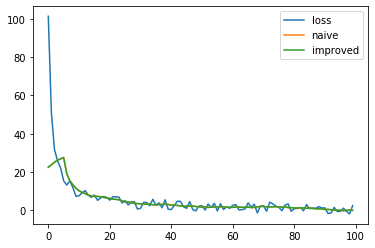

runtime naive algorithm:  0.9007453918457031
runtime improved algorithm:  0.3058910369873047


"It seems that both methods have the same result, however they have a minimal difference, which we can't see in the figure. Also the naive method takes more time than the improved method"

In [38]:
# 1.
def loss(n):    
    return 1.0 / (0.01 * (np.arange(0, n) + 1)) + 3.0 * np.random.uniform(-1.00, 1.00, n)

# TODO: generate f with loss helper function
f = loss(100)

# 2.
def naive_running_mean(f, w):
    '''
    Apply the naive running mean filter and return the smoothed values.

    f -- contains the values
    w -- window size
    '''
    g = np.zeros(len(f))
    f = np.concatenate([np.zeros(w), f, np.zeros(w)])
    

    for i in range(len(f)-2*w):
        sum = 0
        for s in range(i, i+2*w+1):
            sum += f[s]
            
        g[i] = sum/(2*w+1)
        
    
    
    return g

# 3.
def improved_running_mean(f, w):
    '''
    Apply the improved running mean filter and return the smoothed values.

    f -- contains the values
    w -- window size
    '''
    g = np.zeros(len(f))
    f_n = np.zeros(len(f))
    f_n[0] = f[0]
    for x in range(1, len(f)):
        f_n[x] = f[x]+f_n[x-1]
  
    for i in range (len(f_n)):
        if (i-w-1) < 0:
            g[i] = (f_n[i+w])/(2*w+1)
        elif (i+w) >= len(f_n):
            g[i] = (f_n[len(f_n)-1]-f_n[i-w-1])/(2*w+1)
        else:
            g[i] = (f_n[i+w]-f_n[i-w-1])/(2*w+1)
        
    return g

# 4.
ws = 5
naive = naive_running_mean(f, ws)
improved = improved_running_mean(f, ws)

# TODO: Plot all three curves in a single plot
plt.plot(f, label = "loss")
plt.plot(naive, label = "naive")
plt.plot(improved, label = "improved")
plt.legend()
plt.show()

# 5.

# TODO: Measure and print the runtime of both methods in Milliseconds

start_naive = time.time()
naive = naive_running_mean(f, ws)
print('runtime naive algorithm: ', (time.time()-start_naive)*1000)


start_improved = time.time()
improved = improved_running_mean(f, ws)
print('runtime improved algorithm: ', (time.time()-start_improved)*1000)

'''It seems that both methods have the same result, however they have a minimal difference, which we can't see in the figure. Also the naive method takes more time than the improved method'''




## Task 2
(4 points)
1. Create numpy arrays for the horizontal and vertical Sobel kernel.
$$
S_x =\begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

$$
S_y =\begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}
$$

2. Implement the $\textit{convolve}$ function with four nested loops.
3. Load the image from the last exercise and detect its edges using the Sobel kernels and the $\textit{convolve}$ function.
4. Implement the 1D $\textit{convolve_fast}$ function. Apply the seperated Sobel operators $u$ and $v$. Plot the result together with $\textit{convolve(S_x)}$ and compare the runtime.
5. Implement a function that seperates a 2D kernel into 2 1D kernels.
6. (Bonus) Use the function for a gaussian blur kernel and apply it on the image.

In [39]:
# 1
# TODO Create S_x and S_y
S_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype = np.float)
S_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype = np.float)

print('Horizontal Sobel kernel:\n', S_x)
print('Vertical Sobel kernel:\n', S_y)

Horizontal Sobel kernel:
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]
Vertical Sobel kernel:
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]]


In [40]:
# 2
def convolve(arr, ker):
    '''
    Convolve the array using kernel K with four nested for loops.
    
    arr -- 2D array that gets convolved
    ker   -- kernel
    '''
   
    ker_h, ker_w = ker.shape
    
 
    # padd image with zeros
    pad = ker_h//2
    padded = np.pad(arr, ((pad,pad), (pad,pad)), 'constant', constant_values = (0,0))
    arr_conv = np.zeros(shape = arr.shape)
    arr_h, arr_w = padded.shape
    
    for row in range(pad, arr_h-pad):
        for col in range (pad, arr_w-pad):
            for k in range(ker_h):
                for l in range(ker_w):
                    arr_conv[row-pad, col-pad] += padded[(row-pad) + k, (col-pad)+ l]*ker[k,l]
                    
        
    return arr_conv




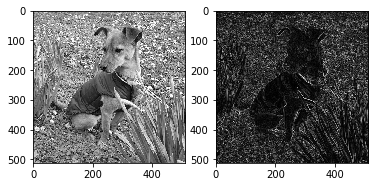

In [41]:
# 3
# TODO: load ./data/pepo.jpg as a grayscale image

image = skimage.io.imread('./data/pepo.jpg')
image = skimage.color.rgb2gray(image)

# TODO: Use the Sobel filter for edge detection:
#       Compute the Gradient Magnitude using both Sobel kernels

edge_y = convolve(image, S_y)
edge_x = convolve(image, S_x)
edges = np.sqrt((edge_x*edge_x)+(edge_y*edge_y))

# Show results
_, axis = plt.subplots(1, 2)
axis[0].imshow(image, cmap='gray')
axis[1].imshow(edges,cmap='gray')
plt.show()

runtime convolve algorithm:  3297.380208969116
runtime improved algorithm:  2047.2078323364258


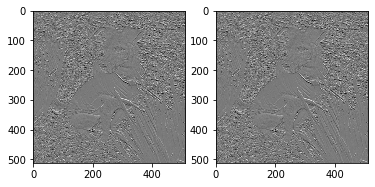

In [42]:
# 4
u = np.array([[-1, 0, 1]])
v = np.array([[1], [2],[1]])

uy = np.array([[-1, -2, -1]])
vy = np.array([[1], [0], [-1]])


def convolve_fast(arr, K_u, K_v):
    '''
    Convolve the array using kernel K_u and K_v.
    
    arr -- 2D array that gets convolved
    K_u -- kernel u
    K_v -- kernel v
    '''
    # flatten to make algorithm run fast
    K_u = K_u.flatten()
    K_v = K_v.flatten()
    
  
    k_w = len(K_v)
    
    # padding of zeros
    pad = k_w//2
    padded = np.pad(arr, ((pad,pad), (pad,pad)), 'constant', constant_values = (0,0))
    w = np.zeros(shape = arr.shape)
    g = np.zeros(shape = arr.shape)
    arr_h, arr_w = padded.shape
      
    # horizontal v
    for row in range(pad, arr_h-pad):
        for col in range (pad, arr_w-pad):
            for k in range(k_w):
                w[row-pad, col-pad] += padded[(row), (col-pad)+k]*K_v[k]
    
    # vertical u
    padded = np.pad(w, ((pad,pad), (pad,pad)), 'constant', constant_values = (0,0))
    
   
    for row in range(pad, arr_h-pad):
        for col in range (pad, arr_w-pad):
            for k in range(k_w):
                g[row-pad, col-pad] += padded[(row-pad)+k, (col)]*K_u[k]
                          
    return g

# TODO: Run both methods and compare their runtime

start_naive = time.time()
edges_naive = convolve(image, S_x)
print('runtime convolve algorithm: ', (time.time()-start_naive)*1000)


start_improved = time.time()
edges_improved = convolve_fast(image, u, v)
print('runtime improved algorithm: ', (time.time()-start_improved)*1000)

# Show results
_, axis = plt.subplots(1, 2)
axis[0].imshow(edges_naive, cmap='gray')
axis[1].imshow(edges_improved,cmap='gray')
plt.show()

In [43]:
# 5
print('rank of s_x:', np.linalg.matrix_rank(S_x))
print('rank of s_y:', np.linalg.matrix_rank(S_y))

def separate(K):
    '''
    Seperate the 2D kernel into 2 1D kernels.
    
    K -- 2D kernel
    '''
    if np.linalg.matrix_rank(K) == 1:
        U, E, V = np.linalg.svd(K)
        K_u = np.array([U[:, 0]]).T
        K_v = np.array([V[0, :]*E[0]])
    else:
        print('the matrix is not separable')
        
    return K_u, K_v

K_u, K_v = separate(S_x)
print('K_u =\n', K_u)
print('K_v =\n', K_v)
print('K   =\n', np.dot(K_u, K_v))

rank of s_x: 1
rank of s_y: 1
K_u =
 [[-0.70710678]
 [ 0.        ]
 [ 0.70710678]]
K_v =
 [[1.41421356 2.82842712 1.41421356]]
K   =
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


naive time:  79969.486951828
improved time:  9302.34432220459


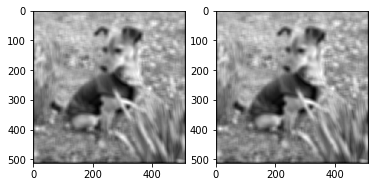

In [44]:
# 6 Bonus
# this takes for-freaking-ever to compute :)
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
def gaussian_kernel(kernel_size, sigma):
    '''
    Return a 2D gaussian kernel.
    
    kernel_size -- size of the kernel
    sigma       -- sigma of the gaussian blur
    '''
    kernel1d = np.linspace(-(kernel_size // 2), kernel_size // 2, kernel_size)
    for i in range(kernel_size):
        kernel1d[i] = dnorm(kernel1d[i], 0, sigma)
    
    kern2d = np.outer(kernel1d.T, kernel1d.T)
    h = kern2d* (1.0 /kern2d.max())
    return h

K = gaussian_kernel(15, 15)

K_u, K_v = separate(K)


# TODO: Run both methods and compare their runtime
naive_time = time.time()
conv_x_naive = convolve(image, K)
print('naive time: ', (time.time()-naive_time)*1000)

improved_time = time.time()
conv_x_improved = convolve_fast(image, K_u, K_v)
print('improved time: ', (time.time()-improved_time)*1000)
# Plot the results
_, axis = plt.subplots(1, 2)
axis[0].imshow(conv_x_naive, cmap='gray')
axis[1].imshow(conv_x_improved,cmap='gray')
plt.show()

## Task 3
(4 points)

1. Implement the naive max function using nested loops.
2. Implement the $\mathcal{O}(n log w)$ faster max function using a binary tree.

In [50]:
#1
def naive_max(arr, ws):
    '''
    Return the maximum-filtered array
    
    arr -- 2D array
    ws -- window size
    '''
    g = np.zeros_like(arr)
    padded = np.pad(arr, ws, 'constant', constant_values=-np.inf)
    
    for i in range(ws, len(arr) + ws):
        max_el = 0
        for j in range(i - ws , i + ws + 1):
            if padded[j] > max_el: 
                max_el = padded[j]
        g[i - ws] = max_el
    
    return g

# Generate some random data to filter
f = []
for i in range(25):
    f.append(random.randint(0, 100))

print('input = ', f)
print('naive_max =', naive_max(f, 3))

input =  [42, 84, 72, 69, 3, 5, 82, 11, 77, 21, 97, 100, 90, 91, 9, 23, 32, 34, 7, 100, 10, 22, 73, 74, 17]
naive_max = [ 84  84  84  84  84  82  82  97 100 100 100 100 100 100 100  91 100 100
 100 100 100 100 100  74  74]


In [51]:
#2
class Node:
    def __init__(self):
        self.max = -np.inf # value of this node
        self.top = None    # reference to parent node
        self.left = None   # left child node
        self.right = None  # right child node
        
        # HINT: this list will hold a reference to all leaf nodes that
        #       are children of this node.
        #       You will need later to add new and replace old values
        #       in the tree.
        self.elems = []    # list of all child leaf nodes
    
    
    def build_tree(self, depth, top=None):
        '''
        Build up a tree of certain depth
        
        depth -- tree depth
        top -- parent node
        '''
        self.top = top
        
        if depth > 0:
            # TODO: recursively initialize all children
            self.right = Node()
            self.left = Node()
            self.right.top = self
            self.left.top = self 
            elems_right = self.right.build_tree(depth-1, self)
            elems_left = self.left.build_tree(depth-1, self)
            
            
            
            # TODO: concatenate elems lists of children
            # HINT: nodes that are not leafes should not be added
            #       to self.elems
            self.elems = np.append(self.elems, elems_right)
            self.elems = np.append(self.elems, elems_left)
           
        
        else:
            # TODO: this is a leaf node
            # HINT: this node has to be added to the elems list
            self.elems = np.append(self.elems, self)
        
        return self.elems
    
    
    def update(self):
        '''
        Update the value (self.max) of this node
        and its parent nodes recursively
        '''
        self.max = max(self.left.max, self.right.max)
        
        if self.top != None:
            self.top.update()
            
        pass


class MaxTree:
    def __init__(self, ws):
        '''
        ws -- window size
        '''
        # TODO: compute number of leafes and tree depth (length = 2 * ws + 1)
        self.length = 2 * ws + 1
        self.depth = int(np.ceil(np.log2(self.length)))
        # TODO: initialize root node 
        self.root = Node()
        # init pointer to next element to be replaced
        self.ptr = 0
        
    def replace_elem(self, value):
        '''
        Replace an element (value of leaf node) in the tree

        value -- value of new element
        '''
        # HINT: use self.ptr as a pointer to the next
        #       element that has to be replaced
        self.root.elems[self.ptr].max = value
        if self.ptr < (self.length - 1):
            self.ptr += 1
        else:
            self.ptr = 0
        
        pass

    
    def get_max(self):
        return self.root.max

tree = MaxTree(3)

def fast_max(arr, ws):
    '''
    Return the maximum-filtered array
    
    arr -- 2D array
    ws -- window size
    '''
    max_arr = np.zeros_like(arr)
    
    # TODO: initialize tree
    tree = MaxTree(ws)
    elems = tree.root.build_tree(tree.depth)
    padded = np.pad(arr, ws, 'constant', constant_values=-np.inf) 
    
    for i in range(tree.length):
        tree.replace_elem(padded[i])
    
    for i in range(tree.length): 
        elems[i].top.update()
    
    # TODO: compute maximum-filtered output array   
    for j in range(ws, len(arr) + ws - 1):
        max_arr[j - ws] = tree.get_max()
        new_val = tree.ptr
        tree.replace_elem(padded[j + ws + 1]) 
        elems[new_val].top.update()
    
    max_arr[-1] = tree.get_max() 
    return max_arr


print('input = ', f)
print('fast_max =', fast_max(f, 3))

input =  [42, 84, 72, 69, 3, 5, 82, 11, 77, 21, 97, 100, 90, 91, 9, 23, 32, 34, 7, 100, 10, 22, 73, 74, 17]
fast_max = [ 84  84  84  84  84  82  82  97 100 100 100 100 100 100 100  91 100 100
 100 100 100 100 100  74  74]


We now use your implementation to filter an image with different window sizes.
Note, that for small windows, the naive method is indeed faster due to the lower overhead.
However, as it has a much better time complexity, the tree method is much faster for large windows.


Filter with window size 2
Naive implementation took 1422.891 ms
Improved implementation took 2069.904 ms


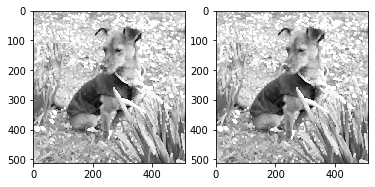


Filter with window size 4
Naive implementation took 1988.973 ms
Improved implementation took 2700.850 ms


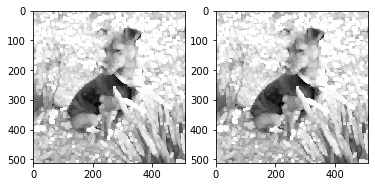


Filter with window size 8
Naive implementation took 3077.186 ms
Improved implementation took 3568.002 ms


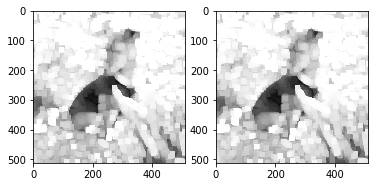


Filter with window size 16
Naive implementation took 5075.861 ms
Improved implementation took 5774.720 ms


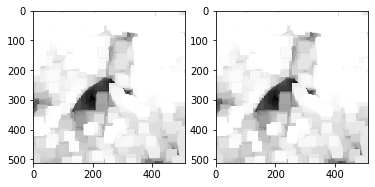


Filter with window size 32
Naive implementation took 9301.032 ms
Improved implementation took 7634.410 ms


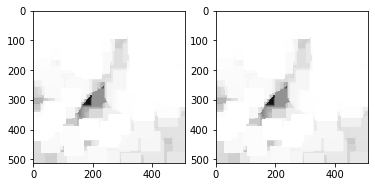

In [52]:
# Nothing to do here ;)
def image_max(arr, ws, method):
    '''
    Apply a max-filter to an image
    
    arr -- input image
    ws -- window size
    method -- filter function
    '''
    out = np.zeros_like(arr)
    
    for y in range(arr.shape[0]):
        out[y] = method(arr[y], ws)
    
    for x in range(arr.shape[1]):
        out[:, x] = method(out[:, x], ws)
    
    
    return out

for ws in [2, 4, 8, 16, 32]:
    print('\nFilter with window size {}'.format(ws))
    start_time = time.time()
    max_img_naive = image_max(image, ws, naive_max)
    naive_time = time.time() - start_time
    print('Naive implementation took {:.3f} ms'.format(1000 * naive_time))

    start_time = time.time()
    max_img_improved = image_max(image, ws, fast_max)
    improved_time = time.time() - start_time
    print('Improved implementation took {:.3f} ms'.format(1000 * improved_time))

    _, axis = plt.subplots(1, 2)
    axis[0].imshow(max_img_naive, cmap='gray')
    axis[1].imshow(max_img_improved,cmap='gray')
    plt.show()